# KNN for Diabetes

2570347- Huynh Huu Hai Trieu

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [52]:
# Load data
dataset = pd.read_csv('diabetes.csv')

In [53]:
# get rows, colums
dataset.shape

(768, 9)

In [54]:
#max, min, mean of dataset attribute
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
#Display statistical summary for all columns
dataset.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
#Show vài dòng đầu tiên của dữ liệu
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
#Show vài dòng cuối của dữ liệu
dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [58]:
# T number of instances (rows) that belong to each class.
dataset.groupby('Pregnancies').size()

,0
Pregnancies,
0,111
1,135
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [59]:
dataset.groupby('Glucose').size()

,0
Glucose,
0,5
44,1
56,1
57,2
61,1
...,...
195,2
196,3
197,4


In [60]:
dataset.groupby('BloodPressure').size()

,0
BloodPressure,
0,35
24,1
30,2
38,1
40,1
44,4
46,2
48,5
50,13


In [61]:
dataset.groupby('SkinThickness').size()

,0
SkinThickness,
0,227
7,2
8,2
10,5
11,6
12,7
13,11
14,6
15,14


In [62]:
dataset.groupby('Insulin').size()

,0
Insulin,
0,374
14,1
15,1
16,1
18,2
...,...
579,1
600,1
680,1


In [63]:
dataset.groupby('BMI').size()

,0
BMI,
0.0,11
18.2,3
18.4,1
19.1,1
19.3,1
...,...
53.2,1
55.0,1
57.3,1


In [64]:
dataset.groupby('DiabetesPedigreeFunction').size()

,0
DiabetesPedigreeFunction,
0.078,1
0.084,1
0.085,2
0.088,2
0.089,1
...,...
1.893,1
2.137,1
2.288,1


In [65]:
dataset.groupby('Age').size()

,0
Age,
21,63
22,72
23,38
24,46
25,48
26,33
27,32
28,35
29,29


Visualization

<Figure size 640x480 with 0 Axes>

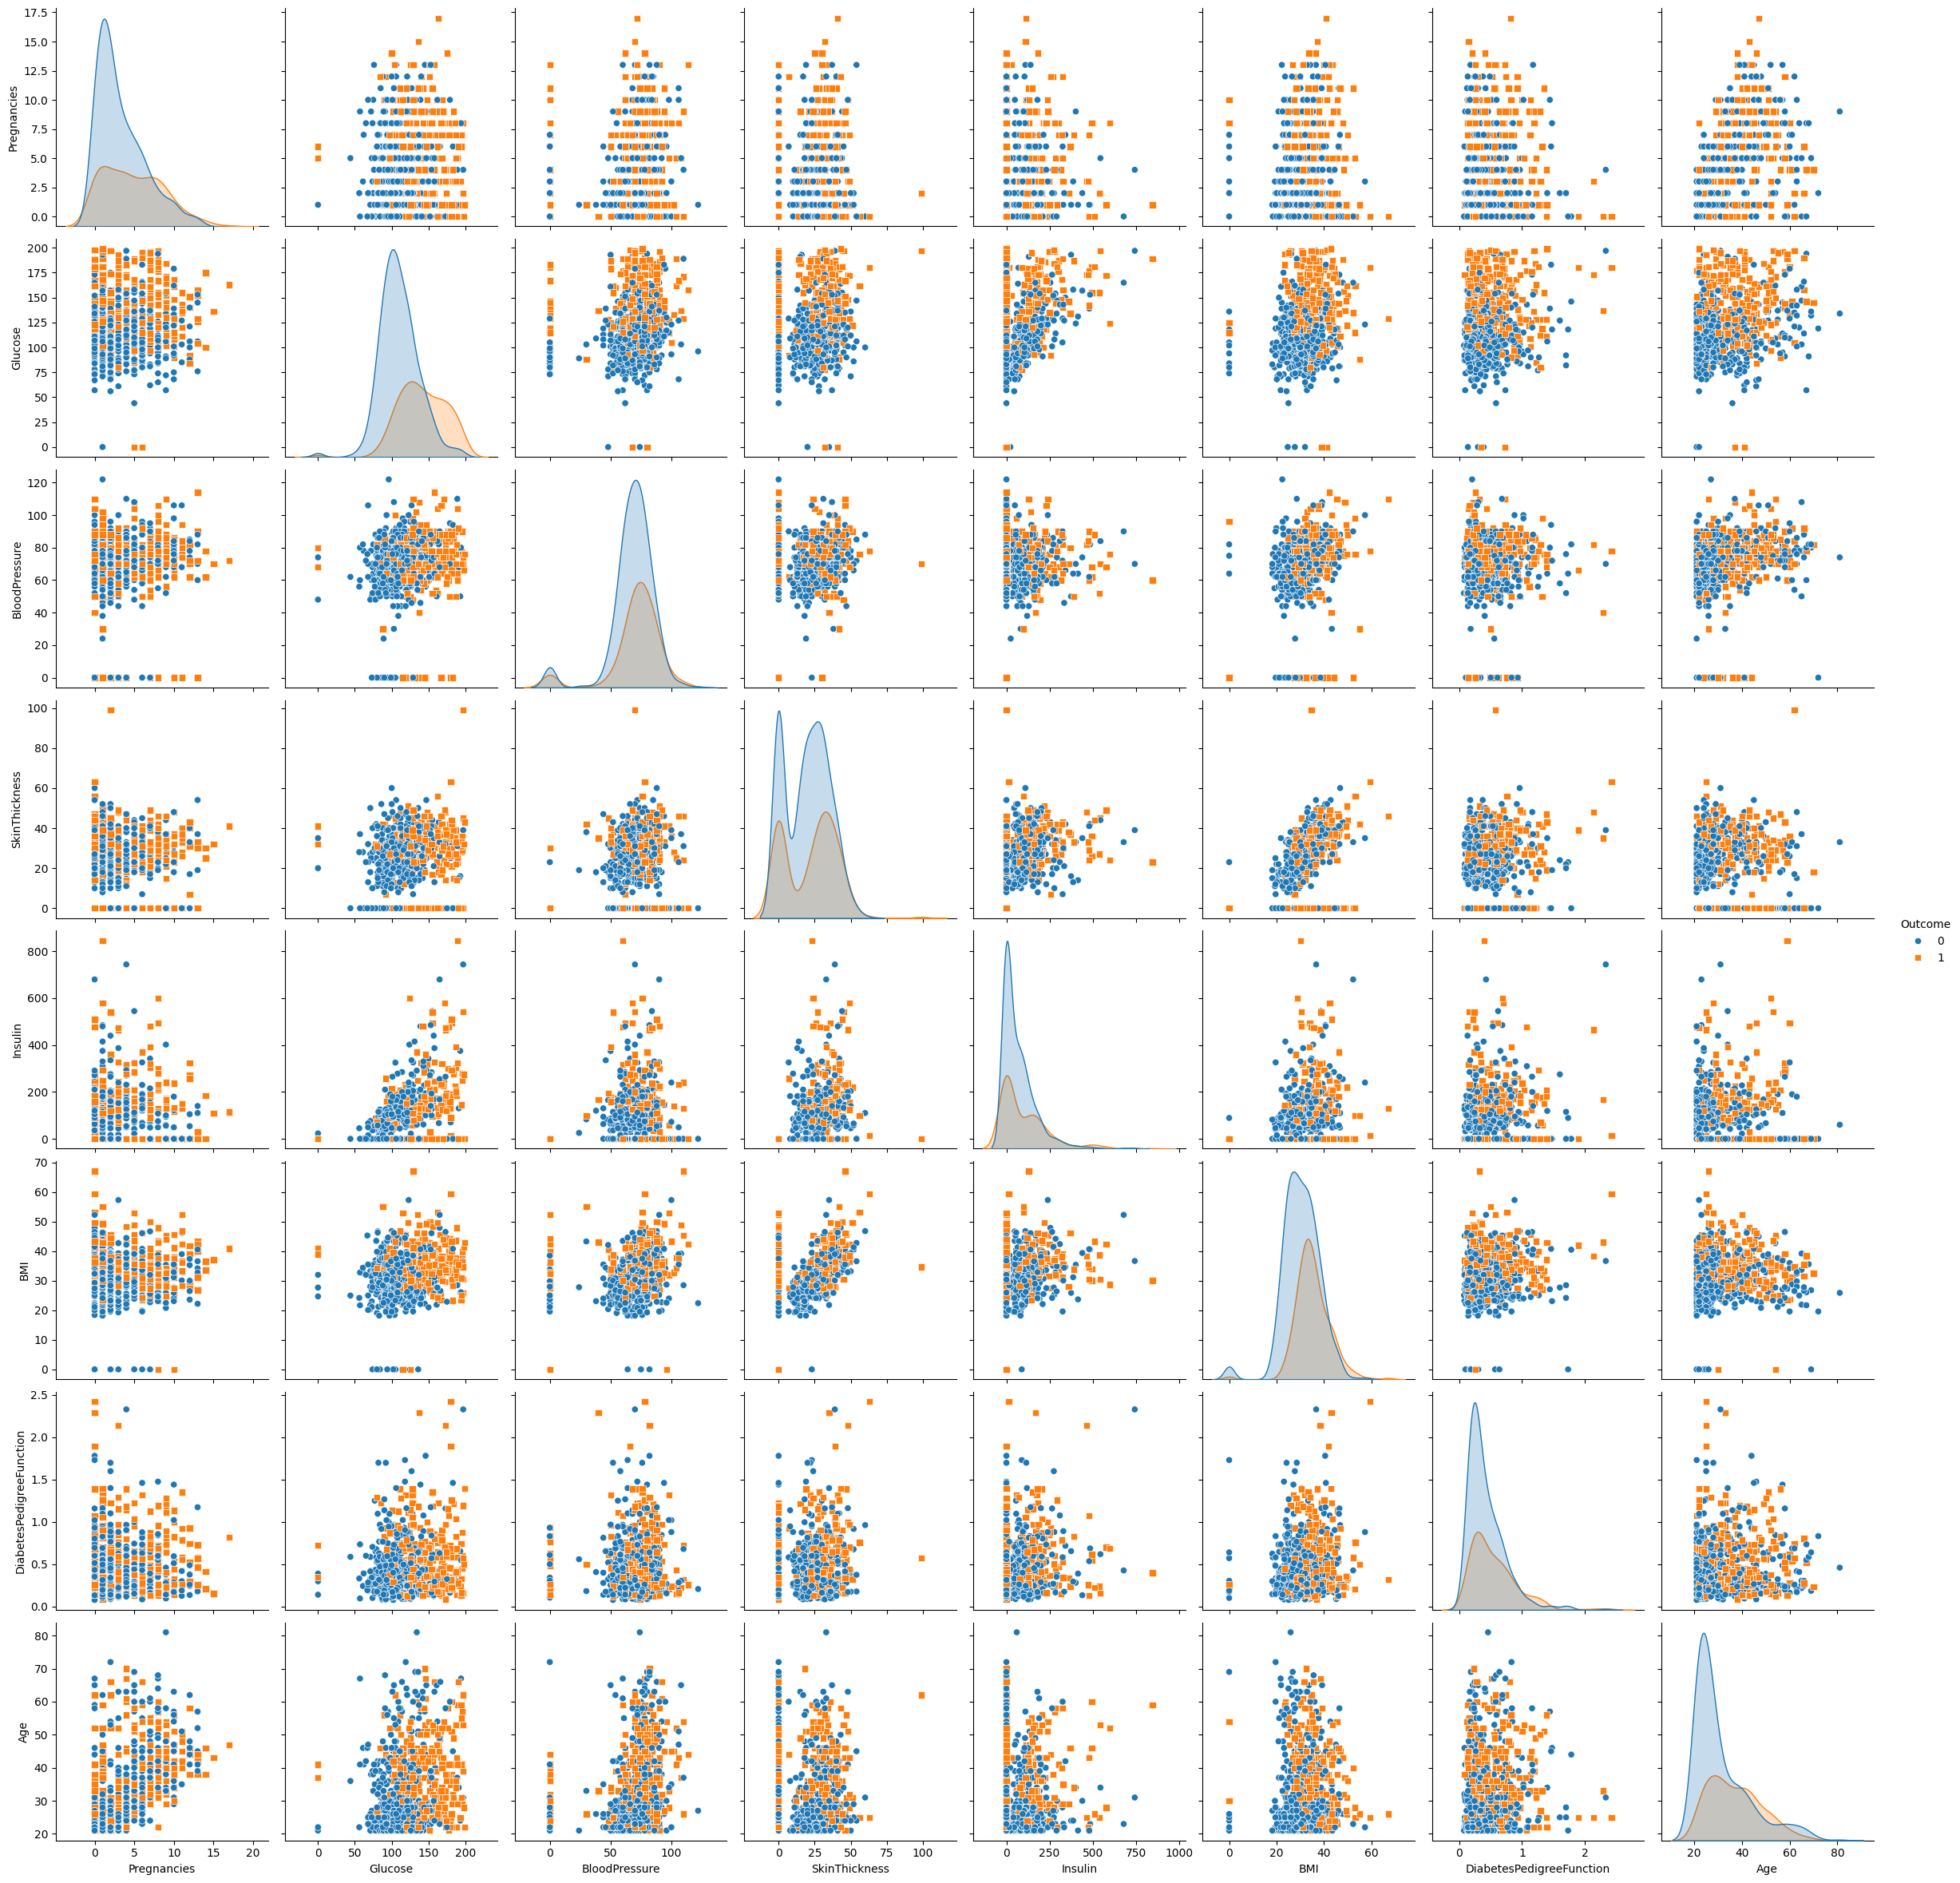

In [66]:
# Tạo một Figure (Khung hình vẽ mới)
plt.figure()
sns.pairplot(dataset, hue = "Outcome", height=3, markers=["o", "s"])
plt.show()

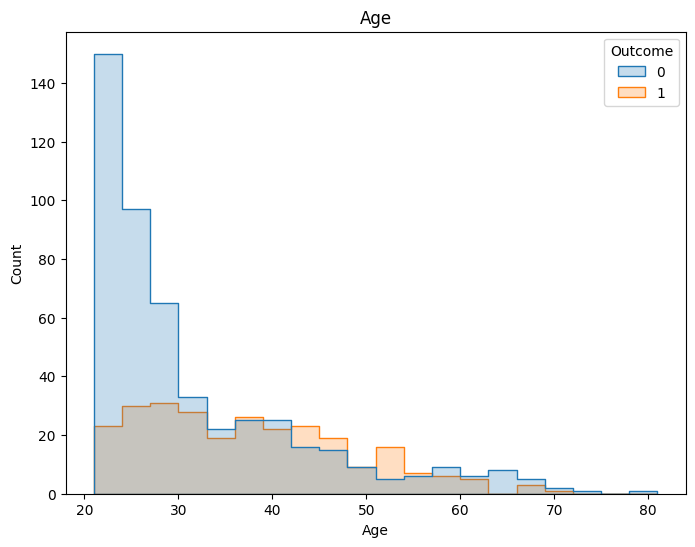

In [67]:
# Age Distribution by Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Age', hue='Outcome', element='step', bins=20)
plt.title("Age")
plt.show()

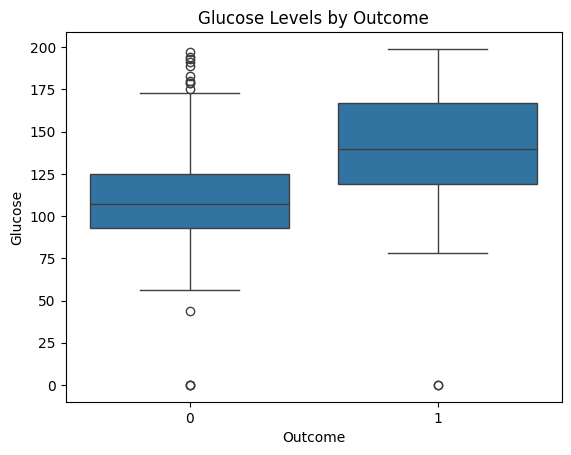

In [68]:
plt.figure()
sns.boxplot(data=dataset, x='Outcome', y='Glucose')
plt.title("Glucose Levels by Outcome")
plt.show()

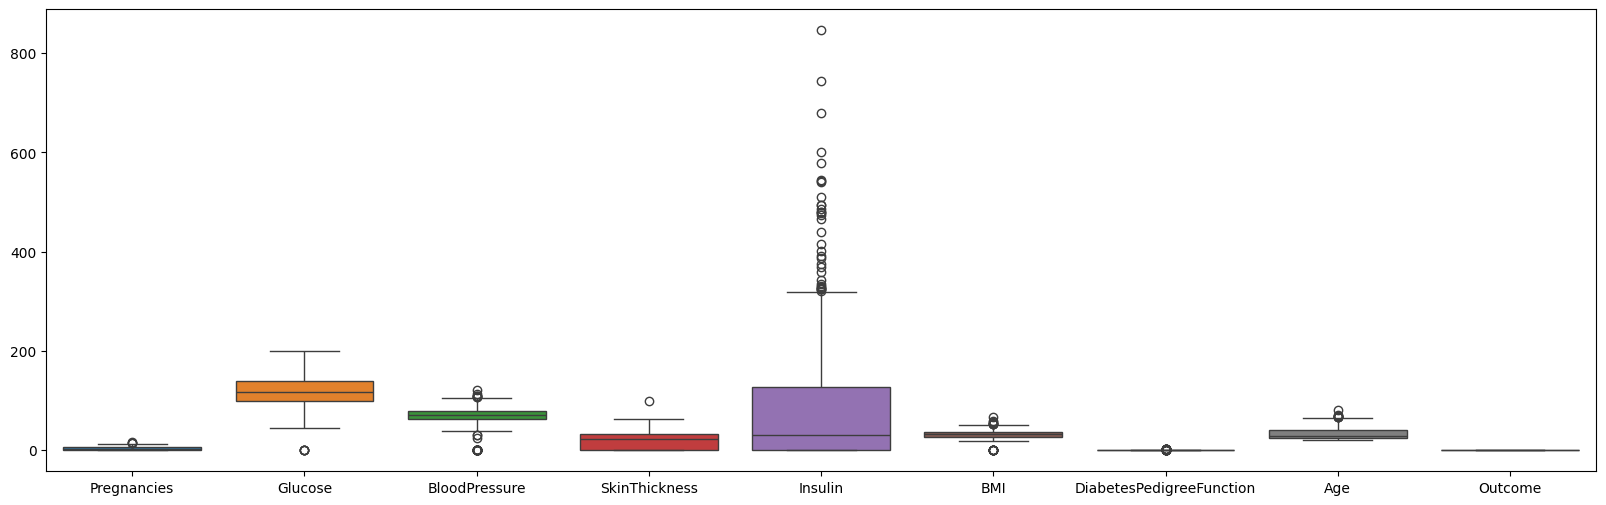

In [69]:
# Data distribution analysis and outlier detection
plt.figure(figsize = (20, 6))
sns.boxplot(data = dataset, width = 0.8)
plt.show()

In [70]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold_factor = 1.5

outliers = ((dataset < (Q1 - outlier_threshold_factor * IQR)) | (dataset > (Q3 + outlier_threshold_factor * IQR)))

columns_with_outliers = outliers.any()

In [71]:
dataset_no_outliers = dataset[~outliers.any(axis=1)]

dataset = dataset[~outliers.any(axis=1)]

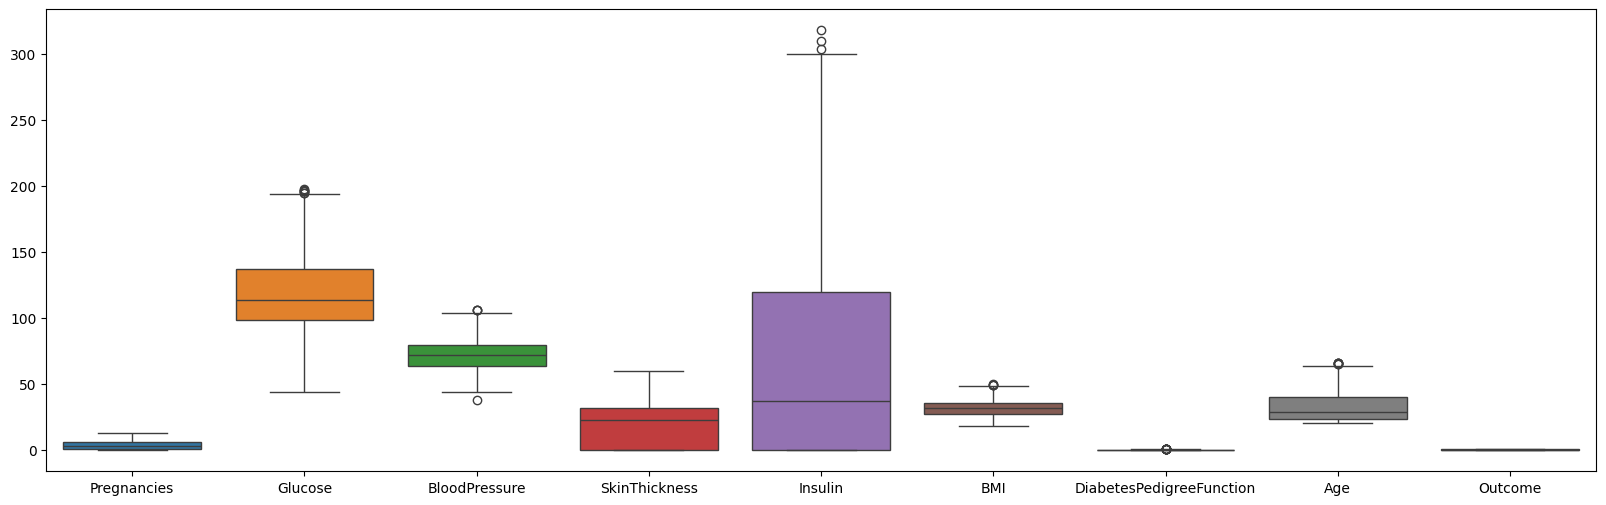

In [72]:
plt.figure(figsize = (20, 6))
sns.boxplot(data = dataset, width = 0.8)
plt.show()

### Normalize, preprocess data, and find the best K for the KNN model

In [73]:
X = dataset.drop('Outcome',axis=1).values
y = dataset['Outcome'].values

In [74]:
scaler = MinMaxScaler()
X_normalized = X.copy()
X_normalized = scaler.fit_transform(X)
X_normalized
# Min-Max Normalization

array([[0.46153846, 0.67532468, 0.5       , ..., 0.48427673, 0.49326146,
        0.64444444],
       [0.07692308, 0.26623377, 0.41176471, ..., 0.26415094, 0.24528302,
        0.22222222],
       [0.61538462, 0.9025974 , 0.38235294, ..., 0.16037736, 0.53369272,
        0.24444444],
       ...,
       [0.38461538, 0.5       , 0.5       , ..., 0.25157233, 0.15004492,
        0.2       ],
       [0.07692308, 0.53246753, 0.32352941, ..., 0.37421384, 0.24348607,
        0.57777778],
       [0.07692308, 0.31818182, 0.47058824, ..., 0.3836478 , 0.21293801,
        0.04444444]])

In [75]:
scaler_z = StandardScaler()
X_normalized_z = X.copy()
X_normalized_z = scaler_z.fit_transform(X)
X_normalized_z

array([[ 0.67382449,  0.99135111, -0.01062636, ...,  0.24797421,
         0.7888924 ,  1.56113222],
       [-0.86065109, -1.170674  , -0.53973612, ..., -0.84085334,
        -0.31175881, -0.15491181],
       [ 1.28761472,  2.19247617, -0.71610604, ..., -1.35415776,
         0.96834641, -0.0645937 ],
       ...,
       [ 0.36692937,  0.06476892, -0.01062636, ..., -0.90307206,
        -0.73447269, -0.24522991],
       [-0.86065109,  0.23635821, -1.06884588, ..., -0.29643957,
        -0.31973455,  1.2901779 ],
       [-0.86065109, -0.89613113, -0.18699628, ..., -0.24977553,
        -0.45532202, -0.87745666]])

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X_normalized_z,y,test_size=0.3,random_state=666)

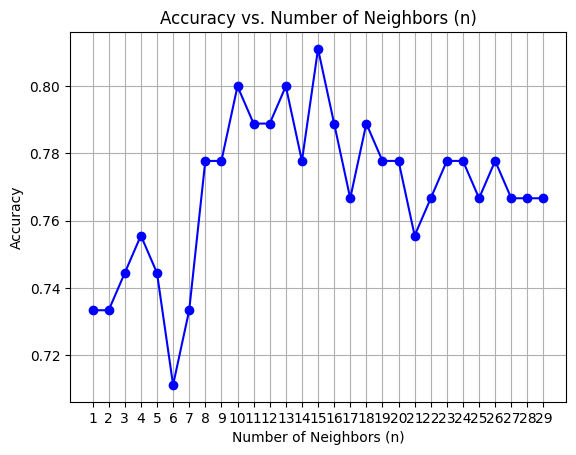

In [77]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

n_values = list(range(1, 30))
accuracies = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_sub, y_train_sub)
    y_pred_val = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracies.append(accuracy)

best_n = n_values[np.argmax(accuracies)]

plt.figure()
plt.plot(n_values, accuracies, marker='o',color = "blue")
plt.title("Accuracy vs. Number of Neighbors (n)")
plt.xlabel("Number of Neighbors (n)")
plt.ylabel("Accuracy")
plt.xticks(n_values)
plt.grid(True)
plt.show()

KNN model

In [78]:
# Create a KNN classifier with the best value of n
knn_best = KNeighborsClassifier(n_neighbors=best_n)

# Train the classifier on the entire training set
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_best.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(test_accuracy)

0.796875


In [79]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [80]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [81]:
cm = confusion_matrix(y_test, y_pred_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       136
           1       0.76      0.45      0.56        56

    accuracy                           0.80       192
   macro avg       0.78      0.69      0.71       192
weighted avg       0.79      0.80      0.78       192

